# Импортируем фреймы

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print(tf.__version__)



2.3.0


In [2]:

df = pd.read_csv('ebw_data.csv')


In [3]:
df

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [5]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [6]:
df.nunique()
df.duplicated().sum()
df.isna()
df.isna().sum()


IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

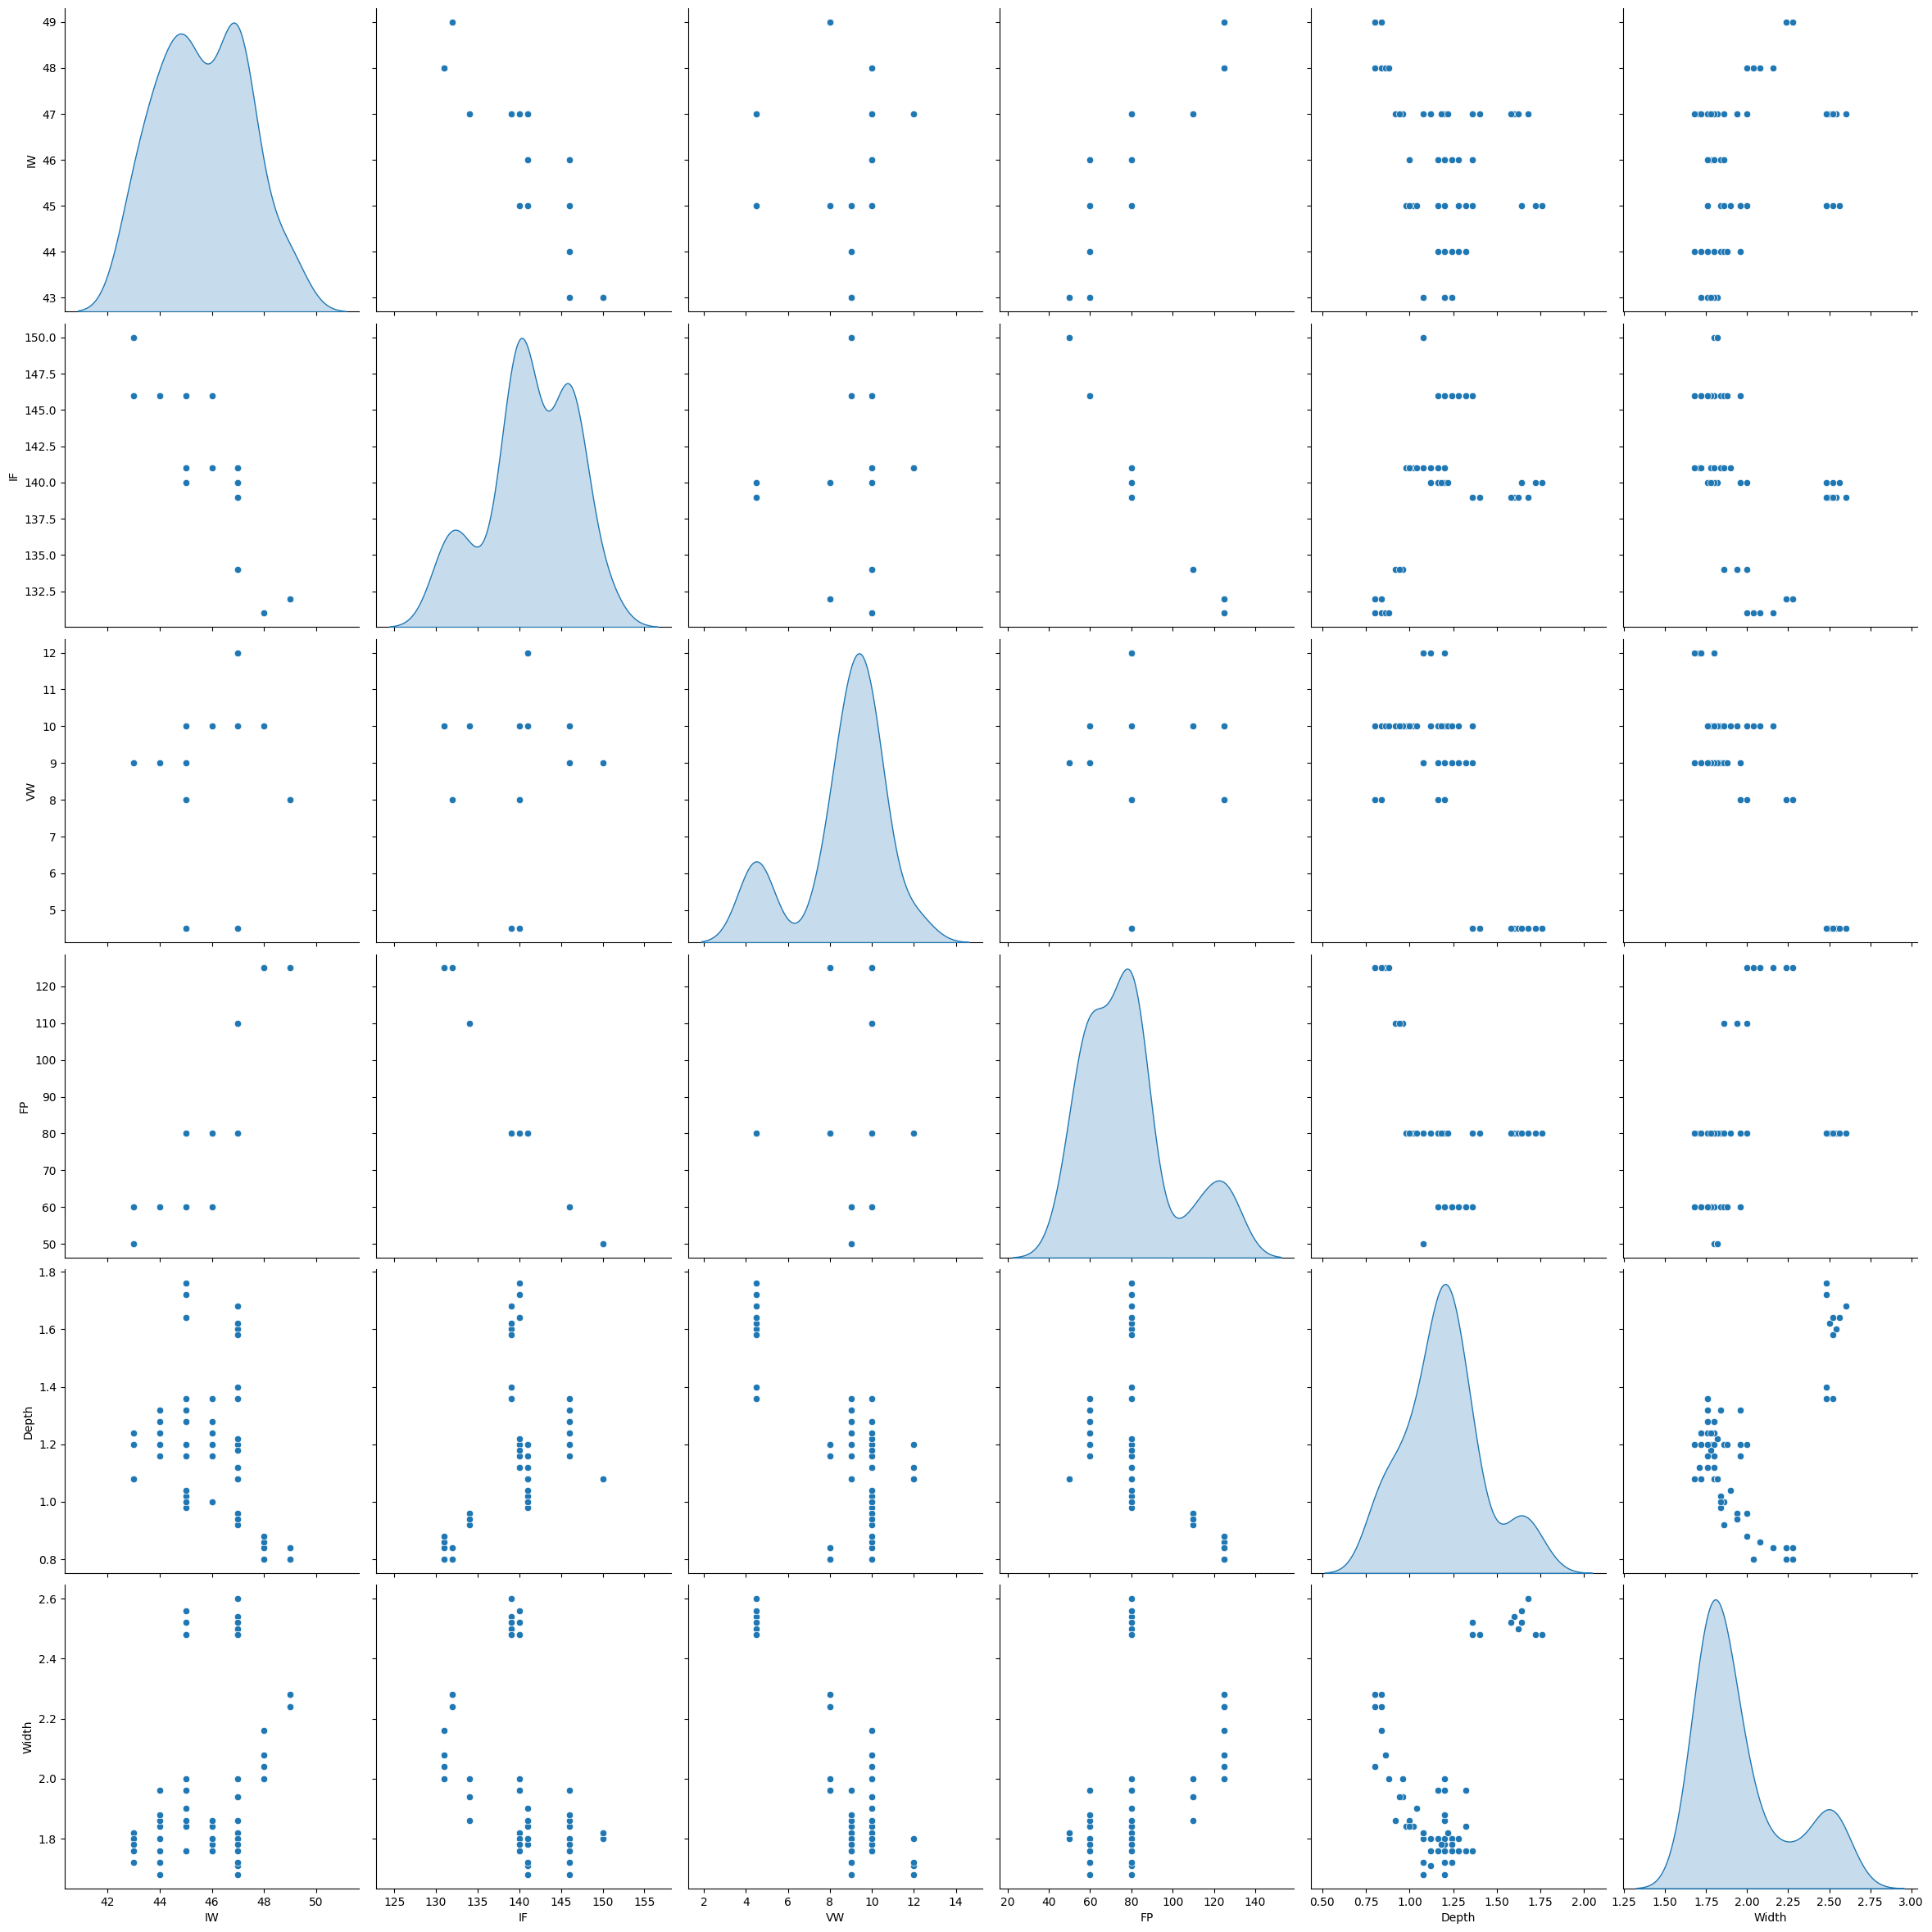

In [7]:
sns.pairplot(df, height=4, diag_kind='kde');

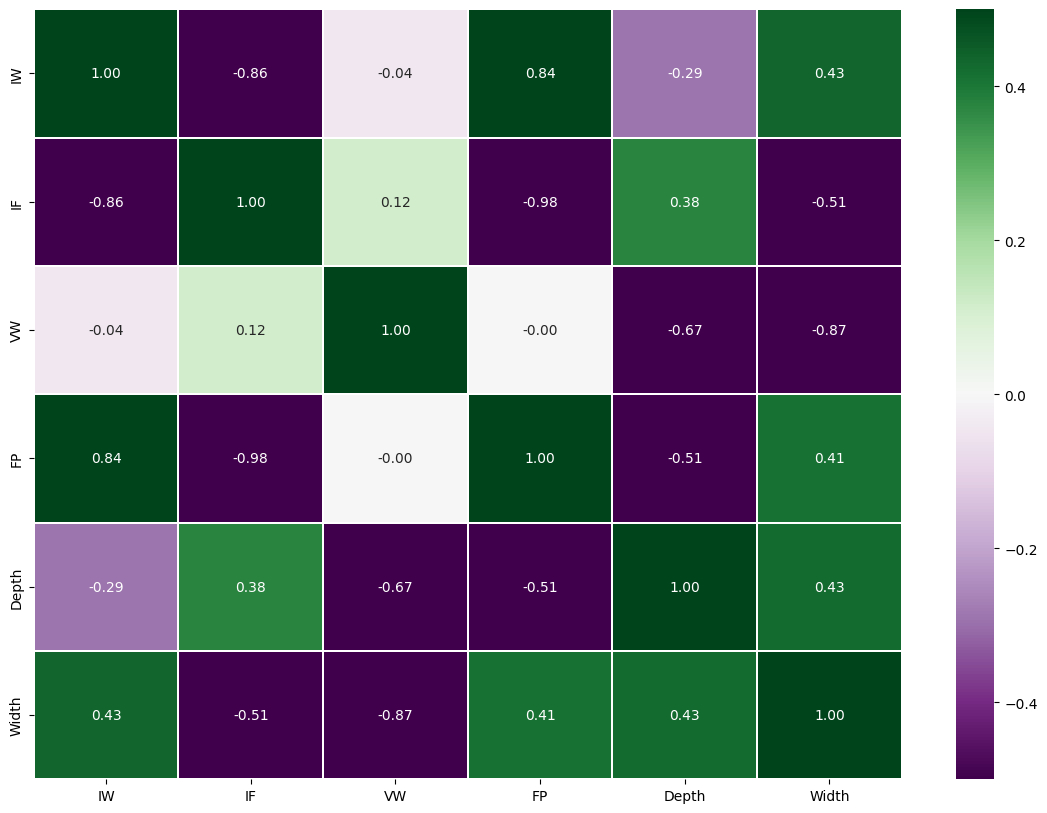

In [8]:
cor_map = df.corr()
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(cor_map, vmin=-0.5, vmax=0.5, annot=True,
fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
plt.show()


<AxesSubplot: ylabel='Density'>

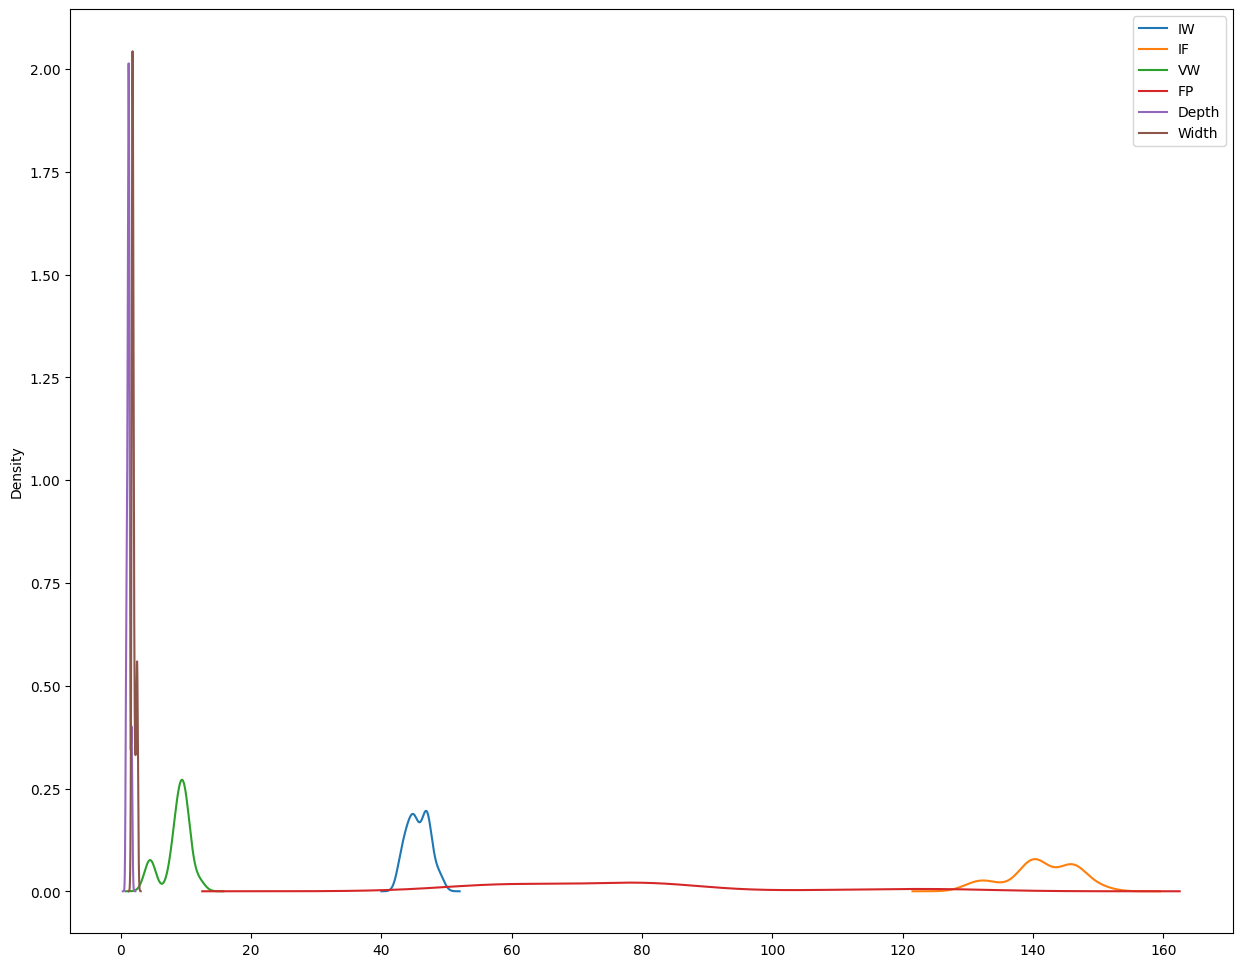

In [9]:
fig, ax = plt.subplots(figsize=(15, 12))
df.plot(kind='kde', ax=ax)

In [10]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df_norm = pd.DataFrame(d, columns=names).round(2)
df_norm.head()


,IW,IF,VW,FP,Depth,Width
0,0.67,0.42,0.0,0.4,0.83,0.93
1,0.67,0.42,0.0,0.4,0.85,0.89
2,0.67,0.42,0.0,0.4,0.92,1.00
3,0.67,0.42,0.0,0.4,0.81,0.91
4,0.33,0.47,0.0,0.4,1.00,0.87


In [11]:
y_traindr = df_norm.pop('Width').values
y_traind = df_norm.pop('Depth').values
y_train1 = df.pop('Width').values
y_train2 = df.pop('Depth').values
x_train = df_norm.values


In [12]:
x_train.shape

(72, 4)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.compile(optimizer='nadam', loss='mse', metrics=['mae'])

In [17]:
history = model.fit(x_train, 
                    y_train1, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
2/2 - 0s - loss: 2.9453 - mae: 1.6827 - val_loss: 1.8963 - val_mae: 1.3768
Epoch 2/100
2/2 - 0s - loss: 2.7057 - mae: 1.6090 - val_loss: 1.7129 - val_mae: 1.3085
Epoch 3/100
2/2 - 0s - loss: 2.5042 - mae: 1.5451 - val_loss: 1.5350 - val_mae: 1.2387
Epoch 4/100
2/2 - 0s - loss: 2.3015 - mae: 1.4767 - val_loss: 1.3612 - val_mae: 1.1664
Epoch 5/100
2/2 - 0s - loss: 2.1002 - mae: 1.4052 - val_loss: 1.1985 - val_mae: 1.0944
Epoch 6/100
2/2 - 0s - loss: 1.9056 - mae: 1.3328 - val_loss: 1.0459 - val_mae: 1.0223
Epoch 7/100
2/2 - 0s - loss: 1.7237 - mae: 1.2608 - val_loss: 0.9029 - val_mae: 0.9497
Epoch 8/100
2/2 - 0s - loss: 1.5482 - mae: 1.1865 - val_loss: 0.7671 - val_mae: 0.8752
Epoch 9/100
2/2 - 0s - loss: 1.3790 - mae: 1.1098 - val_loss: 0.6368 - val_mae: 0.7971
Epoch 10/100
2/2 - 0s - loss: 1.2135 - mae: 1.0323 - val_loss: 0.5149 - val_mae: 0.7165
Epoch 11/100
2/2 - 0s - loss: 1.0587 - mae: 0.9506 - val_loss: 0.4048 - val_mae: 0.6348
Epoch 12/100
2/2 - 0s - loss: 0.9143 - ma

Epoch 95/100
2/2 - 0s - loss: 0.0228 - mae: 0.1230 - val_loss: 0.0290 - val_mae: 0.1592
Epoch 96/100
2/2 - 0s - loss: 0.0228 - mae: 0.1229 - val_loss: 0.0298 - val_mae: 0.1618
Epoch 97/100
2/2 - 0s - loss: 0.0220 - mae: 0.1219 - val_loss: 0.0290 - val_mae: 0.1593
Epoch 98/100
2/2 - 0s - loss: 0.0216 - mae: 0.1209 - val_loss: 0.0283 - val_mae: 0.1571
Epoch 99/100
2/2 - 0s - loss: 0.0213 - mae: 0.1204 - val_loss: 0.0281 - val_mae: 0.1567
Epoch 100/100
2/2 - 0s - loss: 0.0209 - mae: 0.1191 - val_loss: 0.0284 - val_mae: 0.1578


In [18]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='relu'))

In [19]:
model2.compile(optimizer='nadam', loss='mse', metrics=['mae'])

In [20]:
history2 = model2.fit(x_train, 
                    y_train2, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
2/2 - 0s - loss: 1.4617 - mae: 1.1857 - val_loss: 1.5790 - val_mae: 1.2550
Epoch 2/100
2/2 - 0s - loss: 1.4435 - mae: 1.1776 - val_loss: 1.4822 - val_mae: 1.2154
Epoch 3/100
2/2 - 0s - loss: 1.4068 - mae: 1.1612 - val_loss: 1.3619 - val_mae: 1.1649
Epoch 4/100
2/2 - 0s - loss: 1.3652 - mae: 1.1422 - val_loss: 1.2306 - val_mae: 1.1067
Epoch 5/100
2/2 - 0s - loss: 1.2898 - mae: 1.1061 - val_loss: 1.0801 - val_mae: 1.0363
Epoch 6/100
2/2 - 0s - loss: 1.1783 - mae: 1.0522 - val_loss: 0.9402 - val_mae: 0.9664
Epoch 7/100
2/2 - 0s - loss: 1.0270 - mae: 0.9783 - val_loss: 0.8057 - val_mae: 0.8941
Epoch 8/100
2/2 - 0s - loss: 0.8855 - mae: 0.9023 - val_loss: 0.6786 - val_mae: 0.8201
Epoch 9/100
2/2 - 0s - loss: 0.7636 - mae: 0.8320 - val_loss: 0.5584 - val_mae: 0.7435
Epoch 10/100
2/2 - 0s - loss: 0.6555 - mae: 0.7595 - val_loss: 0.4526 - val_mae: 0.6690
Epoch 11/100
2/2 - 0s - loss: 0.5482 - mae: 0.6825 - val_loss: 0.3562 - val_mae: 0.5931
Epoch 12/100
2/2 - 0s - loss: 0.4507 - ma

Epoch 95/100
2/2 - 0s - loss: 0.0101 - mae: 0.0836 - val_loss: 0.0013 - val_mae: 0.0284
Epoch 96/100
2/2 - 0s - loss: 0.0102 - mae: 0.0834 - val_loss: 0.0013 - val_mae: 0.0303
Epoch 97/100
2/2 - 0s - loss: 0.0102 - mae: 0.0819 - val_loss: 0.0013 - val_mae: 0.0279
Epoch 98/100
2/2 - 0s - loss: 0.0097 - mae: 0.0817 - val_loss: 0.0013 - val_mae: 0.0288
Epoch 99/100
2/2 - 0s - loss: 0.0102 - mae: 0.0829 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 100/100
2/2 - 0s - loss: 0.0095 - mae: 0.0815 - val_loss: 0.0013 - val_mae: 0.0289


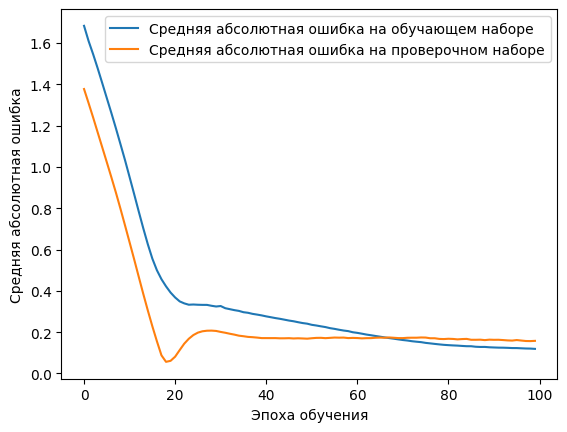

In [21]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

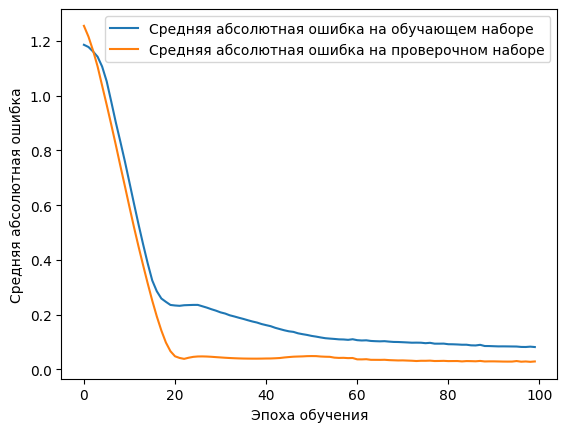

In [22]:
plt.plot(history2.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history2.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [39]:
predictions = model.predict(x_train)
predictions2 = model2.predict(x_train)

In [40]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_train1, predictions)

Test set evaluation:
_____________________________________
MAE: 0.12290182630221051
MSE: 0.02145623214206381
RMSE: 0.14647945979578095
R2 Square 0.7205556487015925
__________________________________


In [41]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_train2, predictions2)

Test set evaluation:
_____________________________________
MAE: 0.07430176403787399
MSE: 0.008440878059515522
RMSE: 0.09187425134125188
R2 Square 0.8310405963473639
__________________________________


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_train, y_train1)

test_pred = rf_reg.predict(x_train)
train_pred = rf_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_train1, test_pred)





Test set evaluation:
_____________________________________
MAE: 0.030895381965581305
MSE: 0.0018534091640627834
RMSE: 0.04305123882146463
R2 Square 0.9758613386491711
__________________________________


In [35]:
rf_reg1 = RandomForestRegressor(n_estimators=1000)
rf_reg1.fit(x_train, y_train2)
test_pred1 = rf_reg1.predict(x_train)
train_pred1 = rf_reg1.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_train2, test_pred1)


Test set evaluation:
_____________________________________
MAE: 0.04297242047193126
MSE: 0.0033641975631473683
RMSE: 0.05800170310557586
R2 Square 0.93265951598504
__________________________________
